# Creating Bode Plots

This notebook demonstrate uss of the [Python Control Systems Library](https://github.com/python-control/python-control) to create and annotate Bode plots. Documentation of the control systems library is available [here](http://python-control.readthedocs.io/en/latest/).

## Initializations

These are the standard initializations with the [Python Control Systems Library](https://github.com/python-control/python-control). 

The control library is imported with full prefix `control`.  This is good practice to avoid name conflicts with other libraries.

The control library has a bug where it continues to make use of the deprecated `hold` command from matplotlib. This results in warnings being issued. Use the warnings library to turn off these distracting warnings.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import control

import warnings
warnings.filterwarnings('ignore')

## Creating Bode Plots

### Specify a Transfer Function

Given a transfer function with time delay

$$G(s) = 0.2 \frac{0.5s + 1}{1.5s^2 + 0.5 s + 1}$$

the first task to create an object representing the transfer function.

In [2]:
# requires coefficients of the numerator and denominator polynomials
# the coefficients are given starting with the highest power of s

G = 0.2*control.tf([0.5,1],[1.5,0.5,1])
print(G)


    0.1 s + 0.2
-------------------
1.5 s^2 + 0.5 s + 1



### Adding Time Delay

Time delay is a common feature of process control applications. The current version of the Python Control Systems Library does not provide a specific representation for time delay. However, the library does provide a function `pade` to create high-order Pade approximations to time delay.

$$G_p(s) = e^{-0.25s} G(s)$$

Here we add a third order pade approximation for a time delay of 0.25 time units.

In [3]:
(num,den) = control.pade(0.25,3)
Gp = control.tf(num,den)*G
print(Gp)


        -0.1 s^4 + 4.6 s^3 - 86.4 s^2 + 576 s + 1536
-------------------------------------------------------------
1.5 s^5 + 72.5 s^4 + 1465 s^3 + 1.205e+04 s^2 + 4800 s + 7680



### Bode Plot using Default Options

Function `control.bode()` returns values of the magnitude ratio, phase lag, and frequency (in rad/time) for a given transfer function. It also creates a bode plot as a side effect.

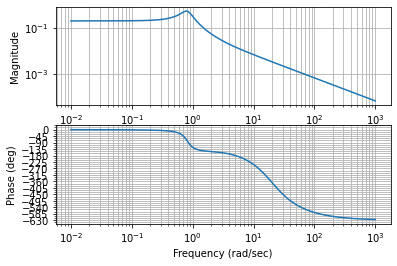

In [4]:
mag,phase,omega = control.bode(Gp)

### Specify Frequency Range

The default frequency range created by `bode` is often too wide. Use `numpy.logspace()` to Fortunately, it is possible to specify a desired set of frequencies at which to evaluate the Bode plot. The frequencies are always specified in radians per unit time.

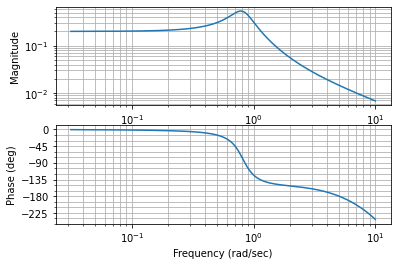

In [5]:
w = np.logspace(-1.5,1,200)
mag,phase,omega = control.bode(Gp,w)

### Setting Other Plotting Options

Bode plots can be customized with several key options as demonstrated in this cell. Note that setting `Hz = True` only changes the x-axis of the resulting bode plot, both input and output frequencies are still specified in radians per unit time.

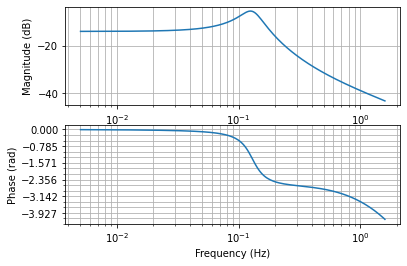

In [6]:
mag,phase,omega = control.bode(Gp,w,Hz=True,dB=True,deg=False)

## Adding Features to the Bode Plot

In addition to creating plots, the `bode` function returns numpy arrays containing the magnitude, phase, and frequency.  

### Crossover Frequency and Gain at Crossover

This data can be used to annotate or add features to a Bode plot. The following cell interpolates the phase data to find the crossover frequency, then interpolates the magnitude data to find the gain at crossover.

Crossover freq =  10.0  rad/sec
Gain at crossover =  0.006840471135257432


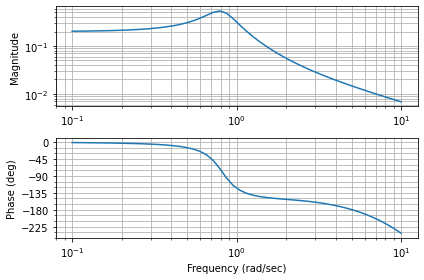

In [7]:
w = np.logspace(-1,1)
mag,phase,omega = control.bode(Gp,w);
plt.tight_layout()

# find the cross-over frequency and gain at cross-over
wc = np.interp(-180.0,np.flipud(phase),np.flipud(omega))
Kcu = np.interp(wc,omega,mag)

print('Crossover freq = ', wc, ' rad/sec')
print('Gain at crossover = ', Kcu)

Text(0.5, 1.0, 'Crossover Frequency = 10 rad/sec')

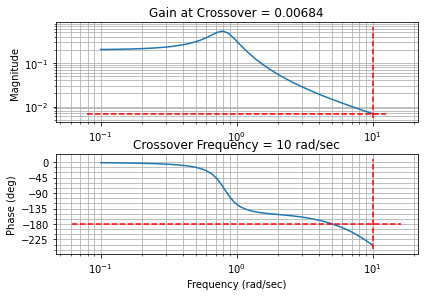

In [8]:
mag,phase,omega = control.bode(Gp,w);
plt.tight_layout()

ax1,ax2 = plt.gcf().axes     # get subplot axes

plt.sca(ax1)                 # magnitude plot
plt.plot(plt.xlim(),[Kcu,Kcu],'r--')
plt.plot([wc,wc],plt.ylim(),'r--')
plt.title("Gain at Crossover = {0:.3g}".format(Kcu))

plt.sca(ax2)                 # phase plot
plt.plot(plt.xlim(),[-180,-180],'r--')
plt.plot([wc,wc],plt.ylim(),'r--')
plt.title("Crossover Frequency = {0:.3g} rad/sec".format(wc))